In [ ]:
# Import needed libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from scipy.stats import linregress
import plotly.graph_objects as go
from tabulate import tabulate

In [ ]:
# Uploading and reading the data
retail = pd.read_csv('Online Retail.csv')
retail.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
# Outputing some information about the data
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The function above outputted the number of rows (samples) and columns (features), the data types in the samples and the number of non-null values in each columns.

In [ ]:
# Checking the exact number of rows and columns in the data
retail.shape

(541909, 8)

The .shape() function outputs the number of samples (rows) and features (columns) in the data, the first number in the result represents the samples while the second number is the total number of features.


In [ ]:
# Finding the statistical information of the data
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The result above gives the statistical summary of the entries in the data. This summary encompasses the counts (number of entries), the mean (what the average of the entries is), the standard deviation (how spread out the entries are from the average), minimum and mamximum (the smallest and the highest number in the entries respectively), the 25%, 50% and the 75% are the quartiles or percentiles in the entries, these show the range where most number fall.

This gives a quick summary of the caharacteristics of the data without necessarily taking a critical look at the data and helps fish out any potential lapses with the data.


In [ ]:
# Checking for missing values in the data.
retail.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
# Finding the actual number of missing values in column in the data.
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Two features have missing values and these are the 'Description' and the 'CustomerID'. The missing values in these columns are enormous and hence have to be cleaned. In this case, i would take a critical look at the data and decide whether to drop those values or replace them with either mode, mean or median.

In [ ]:
# Dropping missing values in the Description and CustomerID features.
retail.dropna(subset=['Description', 'CustomerID'], inplace=True)

Dropping the missing values in both the description and customerId was the most viable option looking at the numbers missing. This is to work with a clean and quality data for better analysis.

In [ ]:
# Making sure the missing values were really dropped.
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Checking for unique entries.
retail.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
# Checking for duplicated entries in the data.
retail.duplicated().sum()

5225

In [ ]:
# Dropping the outputted duplicates.
retail.drop_duplicates(inplace=True)

In [ ]:
# Making sure the duplicates were dropped.
retail.duplicated().sum()

0

In [ ]:
# Outputting categorical values.
retail.select_dtypes(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom
...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12/9/2011 12:50,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,12/9/2011 12:50,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12/9/2011 12:50,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12/9/2011 12:50,France


Categorical variables are ususally not numerical, there could be just alphabets or a mixture of digits and alphabets. InvoiceNo from the name suggests digits but these could have different characters attached to the the numbers that makes them categorical. Basically categorical variables take the form of nominal (groups with no order or ranks), ordinal (groups with order or ranks between them) or binary (yes/no or head/tail format).

In [ ]:
# Checking for the countries in the data.
retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
# Chicking the number of countries present in the data
retail['Country'].nunique()

37

In [ ]:
# Outputting each contry's value counts
retail['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Checking for canceled transactions
can_retail = retail[retail['Quantity']<0]
can_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Checking the statistical summary of the canceled transactions
can_retail.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


The result above gives the statistical summary of the entire canceled transactions in the data. This summary encompasses the counts (number of entries)of canceled transactions, the mean (what the average of the canceled transactions is), the standard deviation (how spread out the canceled transactions are from the average), minimum and mamximum (the smallest and the highest number in the output respectively), the 25%, 50% and the 75% are the quartiles or percentiles in the output, these show the range where most number fall.

This gives a quick summary of the caharacteristics of the canceled transaction without necessarily looking critically at the entire output and help fish out the nature of this output. The peculiar thing about the canceled transaction is that it has it stockcode starting off with a 'C' and a negative quantity.

In [ ]:
# Chexking the number of rows and columns in the canceled transaction
can_retail.shape

(8872, 8)

In [ ]:
# Finding the percentage of the cancelled transaction to the entire data.
can_retail.shape[0]/retail.shape[0]*100

2.209141343213713

2.209% of the entire data went into canceled transaction.

In [ ]:
# Finding unique values in the stockcode.
retail['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [ ]:
retail['StockCode'].nunique()

3684

In [ ]:
# Checking for the stockcode with the highest quantity.
retail.groupby('StockCode').sum().sort_values('Quantity',ascending=False).head(1)

,Quantity,UnitPrice,CustomerID
StockCode,,,
84077,53119,139.3,7285096.0


In [ ]:
# Finding the stockcode with the maximum quantity.
retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
          ...  
21144       -12
CRUK        -16
21645       -24
D         -1194
84347     -1475
Name: Quantity, Length: 3684, dtype: int64

In [ ]:
retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(1)

StockCode
84077    53119
Name: Quantity, dtype: int64

From output, the stockcode with the highest quantity (84077 with the description, WORLD WAR 2 GLIDERS ASSTD DESIGNSWORLD WAR 2 G...	) shows that a particular product was purchase the more from the array of products from the online retail shop. I would advice that to maximize your business revenue, you should have a variety of that particular product to appease the taste of the customers that choose that product. You could add about 4 most frequented items from the output to diversify the product display of the retail store inturn increase sales and equally run discounts on some these products to see a hike in their purchase.

In [ ]:
# Outputing thestockcode with the highest frequency.
top_10 = retail['StockCode'].value_counts(normalize=False).head(10)
top_10

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
POST      1196
22197     1110
23203     1108
Name: StockCode, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

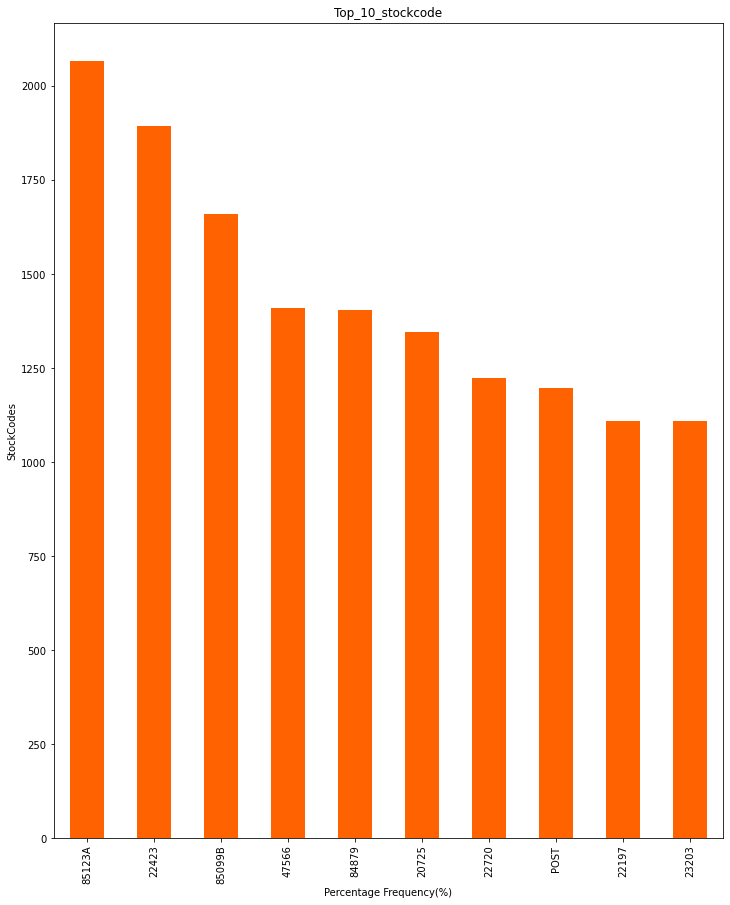

In [ ]:
# Visualizing the top 10 stockcode with the highest frequency
plt.figure(figsize=(12, 15))
top_10.plot(kind='bar', color='#ff6200')
plt.title('Top_10_stockcode')
plt.xlabel('Percentage Frequency(%)')
plt.ylabel('StockCodes')
#plt.gca().invert_yaxis()
plt.show

In [ ]:
# Outputting Stockcode with the highest froquency by 100
top_10_frequencyvalue = top_10/retail.shape[0]*100
top_10_frequencyvalue

85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: StockCode, dtype: float64

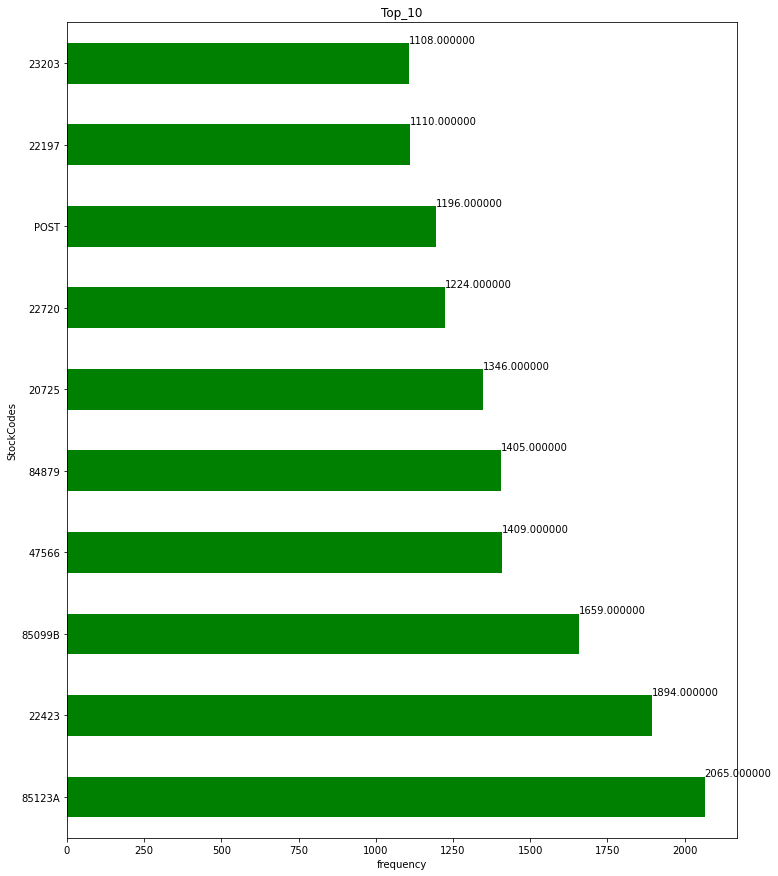

In [ ]:
# Visualizing the percentage of the top 10 stockcode with the highest frequencies
# Importing the matplotlib library.
import matplotlib.pyplot as plt

top_10 = retail['StockCode'].value_counts(normalize=False).head(10)

plt.figure(figsize=(12, 15))
top_10.plot(kind='barh', color='green')
plt.title('Top_10')
plt.xlabel('frequency')
plt.ylabel('StockCodes')
#plt.gca().invert_yaxis()



for index, value in enumerate(top_10):
 #plt.text(value, index, str(value), ha='right', va='center', fontsize=10)
 plt.text(value,index+0.25,f'{value:2f}',fontsize=10)

plt.show()

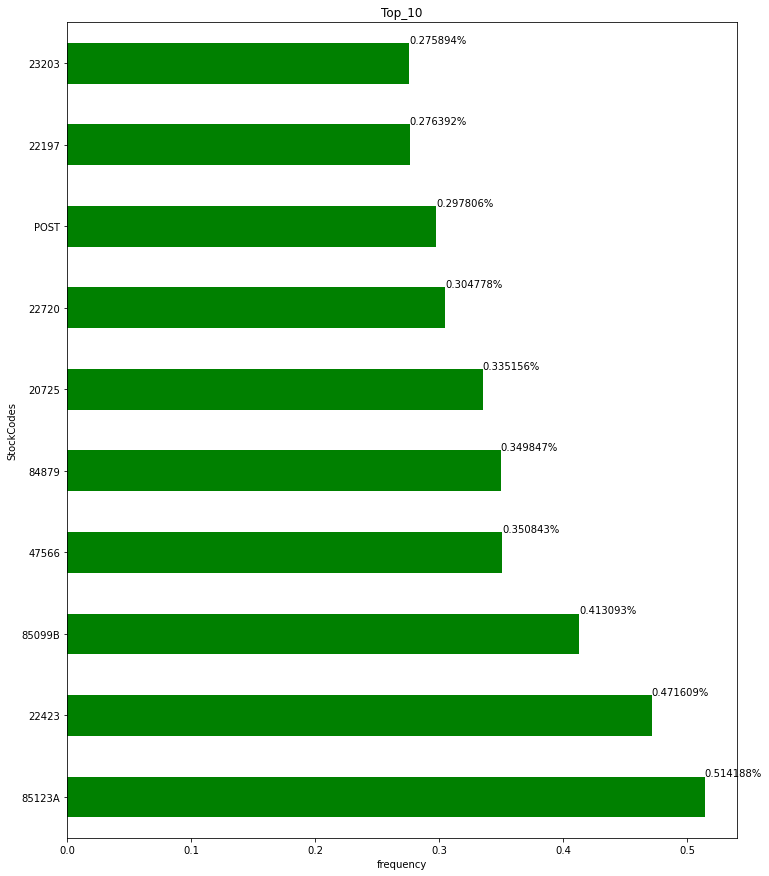

In [ ]:
# Outputing thestockcode with the highest frequency.
# top_10 = retail['StockCode'].value_counts(normalize=False).head(10)
# print(top_10)

# Stockcode for the highest froquency by 100
# top_10_frequencyvalue = top_10/retail.shape[0]*100
# print(top_10_frequencyvalue)

# Visualizing the percentage of the top 10 stockcode with the highest frequencies
# Importing the matplotlib library.
import matplotlib.pyplot as plt
import pandas as pd
top_10 = retail['StockCode'].value_counts(normalize=False).head(10)
top_10_frequencyvalue = top_10/retail.shape[0]*100
plt.figure(figsize=(12, 15))
top_10_frequencyvalue.plot(kind='barh', color='green')
plt.title('Top_10')
plt.xlabel('frequency')
plt.ylabel('StockCodes')
#plt.gca().invert_yaxis()



for index, value in enumerate(top_10_frequencyvalue):
 #plt.text(value, index, str(value), ha='right', va='center', fontsize=10)
 plt.text(value,index+0.25,f'{value:2f}%',fontsize=10)

plt.show()

In [ ]:
# listing the postage in the Description column
retail[retail['Description'].str.contains('POSTAGE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/9/2011 10:10,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.0,12526.0,Germany


In [ ]:
# Outputting the characters that are represented in stockcode
retail['StockCode'].str[0].unique()

array(['8', '7', '2', '4', '1', 'P', '3', 'D', '9', 'C', '5', 'M', '6',
       'B'], dtype=object)

In [ ]:
# Frequency of all countries
retail['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Number of countries in the data
retail['Country'].nunique()

37

In [ ]:
# Outputting transactions for United Kingdom (Uk)
Uk = retail[retail['Country'] == 'United Kingdom']
Uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [ ]:
# Finding the product with the highest frequency in the data under Uk
Uk.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate      UnitPrice  CustomerID  Country       
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER     6        12/1/2010 8:26   4.25       17850.0     United Kingdom    1
569524     22477      WATERING CAN GARDEN MARKER            1        10/4/2011 14:42  1.25       14506.0     United Kingdom    1
           22577      WOODEN HEART CHRISTMAS SCANDINAVIAN   1        10/4/2011 14:42  0.29       14506.0     United Kingdom    1
           22574      HEART WOODEN CHRISTMAS DECORATION     1        10/4/2011 14:42  0.85       14506.0     United Kingdom    1
           22572      ROCKING HORSE GREEN CHRISTMAS         1        10/4/2011 14:42  0.85       14506.0     United Kingdom    1
                                                                                                                              ..
553725     23205      CHARLOTTE BAG ALPHABET  DESIGN        10       5/18/2011 16:51  0.85       17047

In [ ]:
# Finding products and description  with the highest purchase in the Uk country
retail[retail['Country'] == 'United Kingdom'].groupby('Description')['Quantity'].sum().nlargest(1)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    47886
Name: Quantity, dtype: int64

In [ ]:
# listing all unspecified country in the country column
retail[retail['Country'] == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,4/11/2011 13:29,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/11/2011 13:29,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,8/22/2011 13:32,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,8/22/2011 13:32,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,8/22/2011 13:32,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,8/22/2011 13:32,6.65,14265.0,Unspecified


In [ ]:
#Find products and description  with the highest purchase in the Unspecified country
retail[retail['Country'] == 'Unspecified'].groupby('Description')['Quantity'].sum().nlargest(1)

Description
60 CAKE CASES VINTAGE CHRISTMAS    36
Name: Quantity, dtype: int64

In [ ]:
# Outputting the description column
retail['Description'].loc[:1000:]

0        WHITE HANGING HEART T-LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART.
                       ...                 
996                SKULLS SQUARE TISSUE BOX
997         PINK PAISLEY SQUARE TISSUE BOX 
998            PACK OF 6 HANDBAG GIFT BOXES
999              TOAST ITS - HAPPY BIRTHDAY
1000    SET/10 IVORY POLKADOT PARTY CANDLES
Name: Description, Length: 977, dtype: object

In [ ]:
# Find descriptions with lower case characters
lowercase = retail['Description'].unique()
lowercase

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
# Outputting the number of lowecase characters
len(lowercase)

3896

In [ ]:
# Checking for anomalies in the data.
lowercase = retail['Description'].unique()
lowercase =[ desc for desc in lowercase if any(char.islower() for char in desc)]
for desc in lowercase:
    print(desc)

Discount
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Manual
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
CRUK Commission
High Resolution Image


There are anomalies in the description such as bank charges,high resolution image ,CRUK Comission and next day carriage. These are anomalies  because they are not products that can be purchased and so therefore should not be present in the data as product name or description.


In [ ]:
# Drop high resolution image from the data
retail.drop(retail[retail['Description'] == 'High Resolution Image'].index, inplace=True)

In [ ]:
# Drop Next Day Carriage from the data.
retail.drop(retail[retail['Description'] == 'Next Day Carriage'].index, inplace=True)

In [ ]:
# Drop Next bank charges from the data.
retail.drop(retail[retail['Description'] == 'bank charges'].index, inplace=True)

In [ ]:
# Viewing the canceled transactions
can_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
can_retail.loc[:100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Reading the data again after some cleaning
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Outputting the InvoiceDate column
retail['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 401521, dtype: object

In [ ]:
# Converting the InvoiceDate column to datetime format
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [ ]:
# Creating a new column 'Invoice Month' based on the 'InvoiceDate'
retail['Invoice Month'] = retail['InvoiceDate'].dt.month_name()
retail['Invoice Month']

0         December
1         December
2         December
3         December
4         December
            ...   
541904    December
541905    December
541906    December
541907    December
541908    December
Name: Invoice Month, Length: 401521, dtype: object

In [ ]:
# Create a new column 'Invoice Day' based on the 'InvoiceDate'
#retail['Invoice Day'] = retail['InvoiceDate'].dt.day_name()
#retail['Invoice Day']

In [ ]:
# Create a new column 'Invoice Year' based on the 'InvoiceDate'
#retail['Invoice Year'] = retail['InvoiceDate'].dt.year
#retail['Invoice Year']

In [ ]:
# Create a new column 'Invoice Dae' based on the 'InvoiceDate'(numerical)
#retail['Invoice Month'] = retail['InvoiceDate'].dt.month

In [ ]:
# Reading the data to check the new added column
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December


In [ ]:
# Outputting the unitprices
retail['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 401521, dtype: float64

In [ ]:
# Filtering products with a UnitPrice of zero
zero_untiprice = retail[retail['UnitPrice'] == 0]
zero_unitprice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,December
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,December
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,December
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,January
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,January
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,January
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,February
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,March
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,March
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,April


In [ ]:
# Filtering products with a UnitPrice of zero
zero_unitprice = retail[retail['UnitPrice'] == 0]
print(zero_unitprice[['UnitPrice']])

        UnitPrice
9302          0.0
33576         0.0
40089         0.0
47068         0.0
47070         0.0
56674         0.0
86789         0.0
130188        0.0
139453        0.0
145208        0.0
157042        0.0
187613        0.0
198383        0.0
279324        0.0
282912        0.0
285657        0.0
298054        0.0
314745        0.0
314746        0.0
314747        0.0
314748        0.0
358655        0.0
361825        0.0
379913        0.0
395529        0.0
420404        0.0
436428        0.0
436597        0.0
436961        0.0
439361        0.0
446125        0.0
446793        0.0
446794        0.0
454463        0.0
454464        0.0
479079        0.0
479546        0.0
480649        0.0
485985        0.0
502122        0.0


In [ ]:
len(zero_unitprice)

40

In [ ]:
del zero_unitprice

In [ ]:
# Making sure the zero unitprice are deleted
retail['UnitPrice'==zero_untiprice]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
541905,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
541906,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
541907,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
# Characters that are represented in stockcode
char_acter = retail['StockCode'].str[0].unique()
print(char_acter)

['8' '7' '2' '4' '1' 'P' '3' 'D' '9' 'C' '5' 'M' '6' 'B']


In [ ]:
# Checking the new number of rows and coulmns
retail.shape

(401521, 9)

In [ ]:
# Checking for unique stockcode
niq = retail["StockCode"].unique()
niq

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [ ]:
# Checking for outliers in the data
outlier_stock = [code for code in niq if sum(c.isdigit() for c in str(code)) in (0,1)]
print("outlier_stock:")


for code in outlier_stock:
 print(code)

outlier_stock:
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [ ]:
outlier_stock

['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

From the above result, the outliers deviate from the norm of stockcodes which happen to be in integers or a mix of a letter and integers. These outputs are solely mostly letters and are not like the usual trends seen in the samples in the stockcode column.

In [ ]:
# Dropping the outlier stock from my dataset
retail.drop(retail[retail['StockCode'].isin(outlier_stock)].index, inplace=True)

In [ ]:
# Delete Outlier_stock
del outlier_stock

In [ ]:
# Creating a new column called transaction status bearing both canceled and completed transaction
retail['Transaction_Status'] = retail['StockCode'].apply(lambda x: 'cancelled'
 if str(x).startswith('C') else 'completed')

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,December,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,December,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed


In [ ]:
# Creating a new variable to bear the old data
new_retail = retail
new_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,December,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,December,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed


In [ ]:
# Veiwing 30 products in the new data
new_retail['Description'].value_counts().head(30)

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
WOODEN PICTURE FRAME WHITE FINISH      900
JUMBO BAG PINK POLKADOT                897
LUNCH BAG APPLE DESIGN                 890
SET OF 4 PA

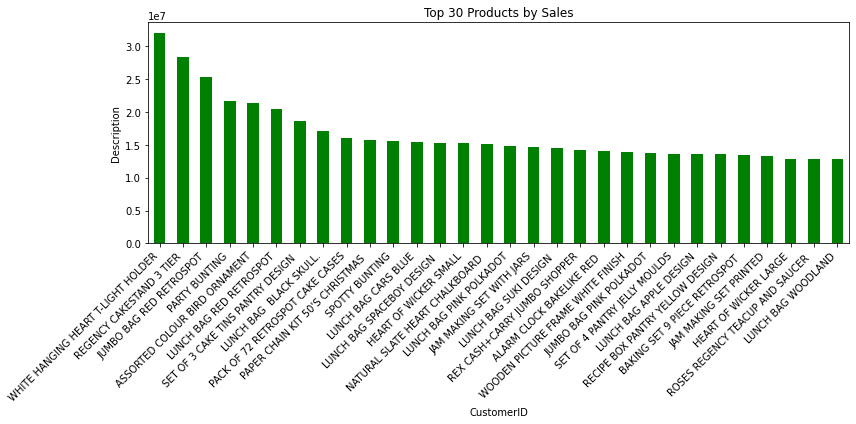

In [ ]:
# Visualizing the 30 products veiwed above using barchart
#Group by product and sum the sales
product_sales = new_retail.groupby('Description')['CustomerID'].sum().nlargest(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='green')
plt.title('Top 30 Products by Sales')
plt.xlabel('CustomerID')
plt.ylabel('Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

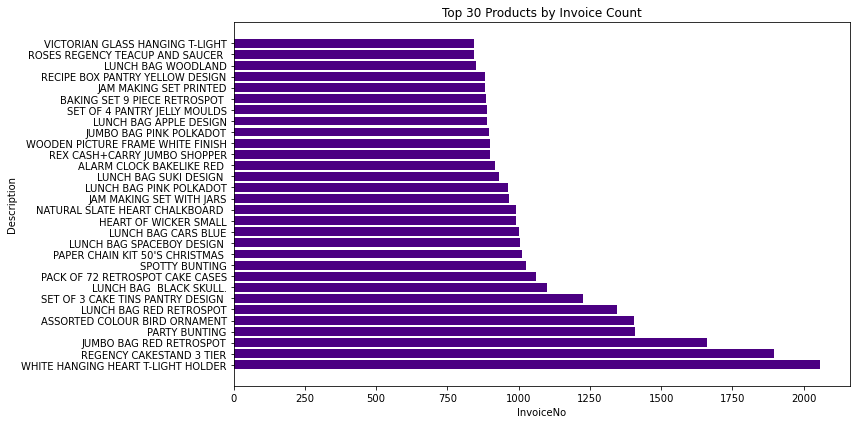

In [ ]:
# Group by Product and it Description, and count InvoiceId occurrences
pdt_invoice_counts = new_retail.groupby(['Description'])['InvoiceNo'].count().reset_index()

# Sort and select the top 30 products based on the count of InvoiceId
top_pdts = pdt_invoice_counts.nlargest(30, 'InvoiceNo')

# Create a bar chart
plt.figure(figsize=(12,6))
plt.barh(top_pdts['Description'], top_pdts['InvoiceNo'], color='indigo')
plt.title('Top 30 Products by Invoice Count')
plt.xlabel('InvoiceNo')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

In [ ]:
# Reading the new data again
new_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Month,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,completed
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,December,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,December,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,December,completed
